# Linear Regression  

### What is Regression?
The main goal of regression is the construction of an efficient model to predict the dependent attributes from a bunch of attribute variables. A regression problem is when the output variable is either real or a continuous value i.e salary, weight, area, etc.

We can also define regression as a statistical means that is used in applications like housing, investing, etc. It is used to predict the relationship between a dependent variable and a bunch of independent variables. Let us take a look at various types of regression techniques.
### Simple Linear Regression
One of the most interesting and common regression technique is simple linear regression. In this, we predict the outcome of a dependent variable based on the independent variables, the relationship between the variables is linear. Hence, the word linear regression.
![alt](https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2019/12/image-1.png)
Simple linear regression is a regression technique in which the independent variable has a linear relationship with the dependent variable. The straight line in the diagram is the best fit line. The main goal of the simple linear regression is to consider the given data points and plot the best fit line to fit the model in the best way possible.
The best fit line can be based on the linear equation given below.
![alt](https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2019/12/linear-equation.png)
- The dependent variable that is to be predicted is denoted by Y.
- A line that touches the y-axis is denoted by the intercept b0.
- b1 is the slope of the line, x represents the independent variables that determine the prediction of Y.
- The error in the resultant prediction is denoted by e.
The cost function provides the best possible values for b0 and b1 to make the best fit line for the data points. We do it by converting this problem into a minimization problem to get the best values for b0 and b1. The error is minimized in this problem between the actual value and the predicted value.
![alt](https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2019/12/image-4.png)
We choose the function above to minimize the error. We square the error difference and sum the error over all data points, the division between the total number of data points. Then, the produced value provides the averaged square error over all data points.

It is also known as MSE(Mean Squared Error), and we change the values of b0 and b1 so that the MSE value is settled at the minimum.

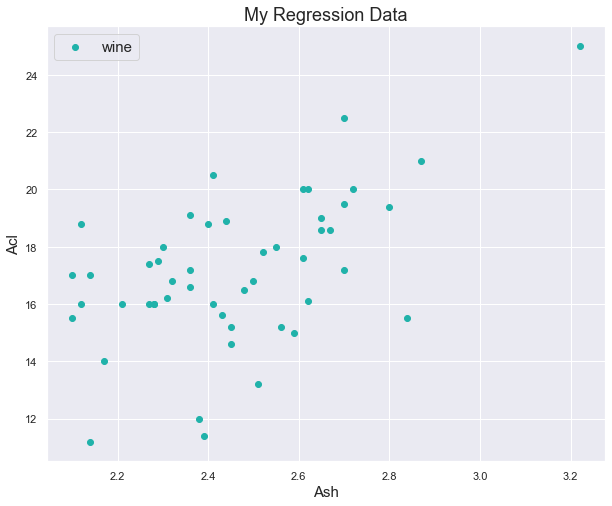

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

from sklearn import datasets
 
df = pd.read_csv("Datasets/wine.csv")
df.head()
df = df.iloc[:50][["Acl", "Ash"]]
plt.figure(figsize = (10, 8))
plt.scatter(df.Ash, 
            df.Acl, 
            color = "lightseagreen",
            label = "wine")
plt.xlabel("Ash", fontsize = 15)
plt.ylabel("Acl", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("My Regression Data", fontsize = 18)
plt.show()

Because we are assuming the target function $f:\mathcal{X} \rightarrow \mathcal{Y}$ is a **linear function of the input features**, and because we know that single neuron models are good function approximators, we next build a single neuron model with a *linear-activation* activation function. Furthermore, in this model we choose the *mean-sqaured error* cost function:

$$
C(\mathbf{w}, b) = \frac{1}{2N}\sum_{i=1}^{N}\Big(\hat{y}^{(i)} - y^{(i)}\Big)^2. 
$$

With our specific case of linear regression with a single feature measurment taken from the iris setosa sepal length data, we next construct a single neuron model with linear activation function and mean-sqaured error cost function  
Before defining a custom ```SingleNeuron``` class, we first need discuss how to use gradient descent to minimize the neurons cost function. More specifically, observe that we wish to solve the following problem:

$$
\min_{w_1, b}C(w_1, b)
$$

Since $C(w_1, b)$ is a differentiable function of both $w_1$ and $b$, we may attempt to solve this minimization problem by applying the gradient descent algorithm:

$$
w_1 \leftarrow w_1 - \alpha \frac{\partial C}{\partial w_1}
$$

$$
b \leftarrow b - \alpha \frac{\partial C}{\partial b}
$$In order to implement the gradient descent method we first need to understand how the partial derivatives of $C(w_1, b)$ are calculated over the training data at hand. With this in mind, suppose for now that we are calculating the mean-sqaured error cost function on a *single example* example of data, i.e., $N = 1$. For this single example we observe that the mean-sqaured error cost function becomes: 

$$
C(w, b; \mathbf{x}^{(i)}, y^{(i)}) = \frac{1}{2}\Big(\hat{y}^{(i)} - y^{(i)}\Big)^2. 
$$

In the case of a linear activation function, it is important to note that $\hat{y}^{(i)}$ is a very simple function of both $w_1$ and $b$. More specifically, we observe:

$$
\hat{y}^{(i)} = a = z = w_1x^{(i)} + b. 
$$

Thus, we may rewrite our neuron cost function with a single observation shown by the following equation:

$$
C(w, b; \mathbf{x}^{(i)}, y^{(i)}) = \frac{1}{2}\Big(w_1x^{(i)} + b - y^{(i)}\Big)^2. 
$$

In [34]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                errors += .5*((self.predict(xi) - target)**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

In [35]:
X = df.Ash.values
X = X.reshape(-1, 1)
y = df.Acl.values

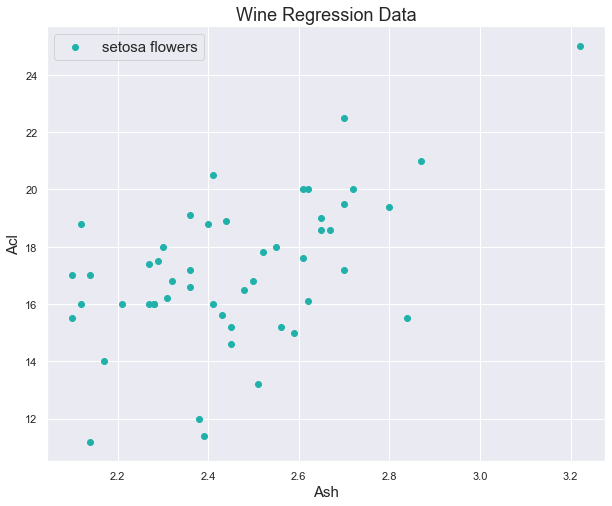

In [36]:
plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "setosa flowers")
plt.xlabel("Ash", fontsize = 15)
plt.ylabel("Acl", fontsize = 15)
plt.title("Wine Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

In [37]:
def linear_activation(z):
    return z

node = SingleNeuron(linear_activation)
node.train(X, y, alpha = 0.01, epochs = 5)

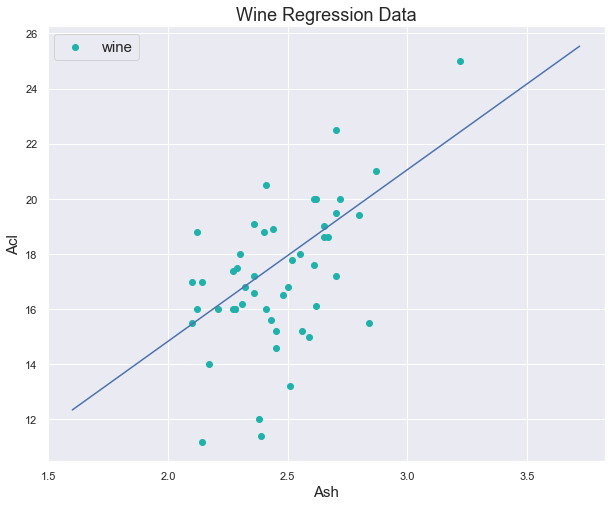

In [38]:
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)


plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "wine")
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("Ash", fontsize = 15)
plt.ylabel("Acl", fontsize = 15)
plt.title("Wine Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

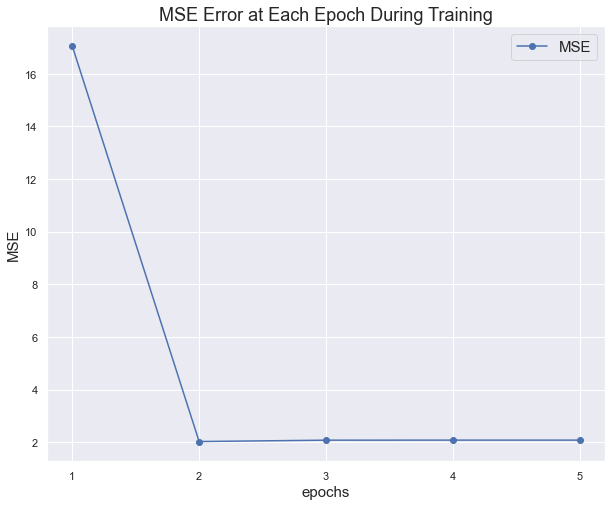

In [39]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

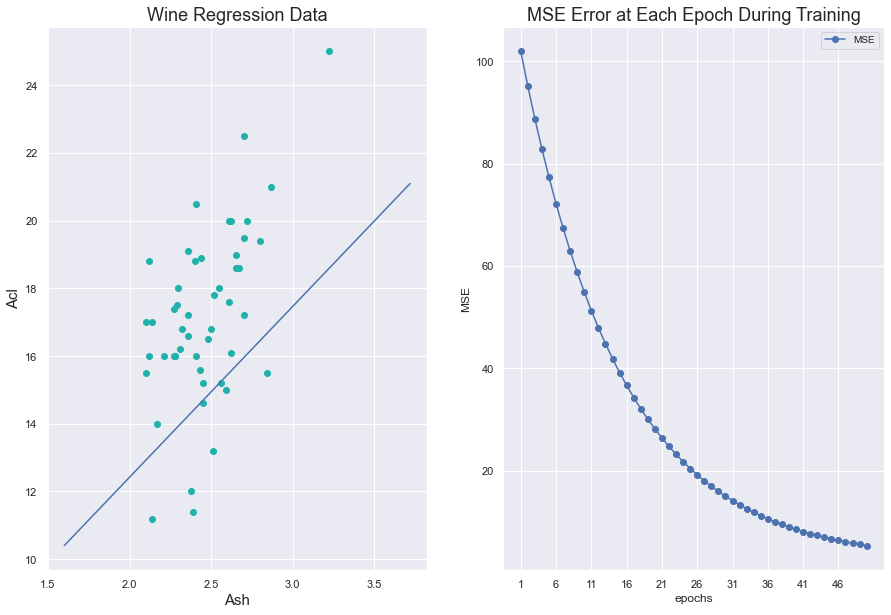

In [40]:
node = SingleNeuron(linear_activation)
node.train(X, y, alpha = .0001, epochs = 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(X, y, color = "lightseagreen")
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("Ash", fontsize = 15)
ax1.set_ylabel("Acl", fontsize = 15)
ax1.set_title("Wine Regression Data", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)

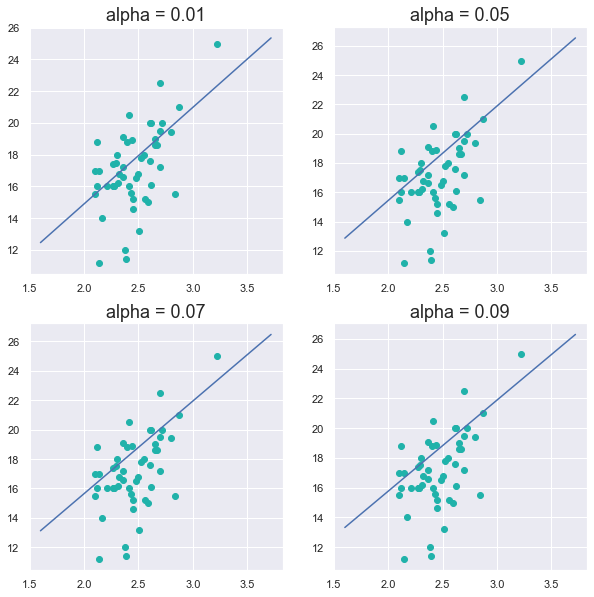

In [41]:
# Possible choices of learning rate 
alphas = [0.01, 0.05, 0.07, 0.09]

domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    node = SingleNeuron(linear_activation)
    node.train(X, y, alpha = alpha, epochs = 55)
    ax.plot(domain, node.predict(domain.reshape(-1, 1)))
    ax.scatter(X, y, color = "lightseagreen")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)